In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
os.chdir(r'C:\Users\shubham mishra\Downloads')
df = pd.read_csv('Credit_card_approval.csv')
import pickle

In [2]:
df

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
df.columns = ['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','Approved']

In [4]:
df.to_csv('Credit_card_approvals.csv',index=None,header=True)

In [5]:
df1 = pd.read_csv('Credit_card_approvals.csv')

In [6]:
df1

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [7]:
df2 = df1.replace('?',np.nan)

In [8]:
df2.isnull().sum()
print(df1.isnull().sum(),':',df1.dtypes)

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64 : Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
dtype: object


# Missing value handling

In [9]:
df2.fillna(df1.mean(),inplace=True)
df2
df2.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [10]:
for i in df1:
    if df2[i].dtypes == object:
        df2 = df1.fillna(df2[i].value_counts().index[0])
print('Total missing values :' + str(df.isnull().values.sum()))
df2.isnull().sum()


Total missing values :0


Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

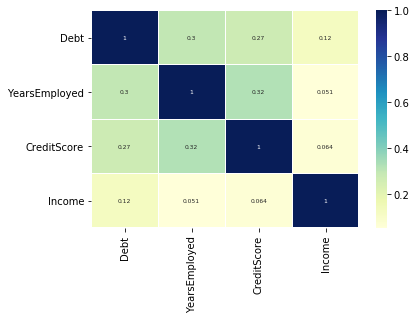

In [11]:
sns.heatmap(df1.corr(),cmap = 'YlGnBu',annot=True,linewidths=0.1, annot_kws={"size":6})

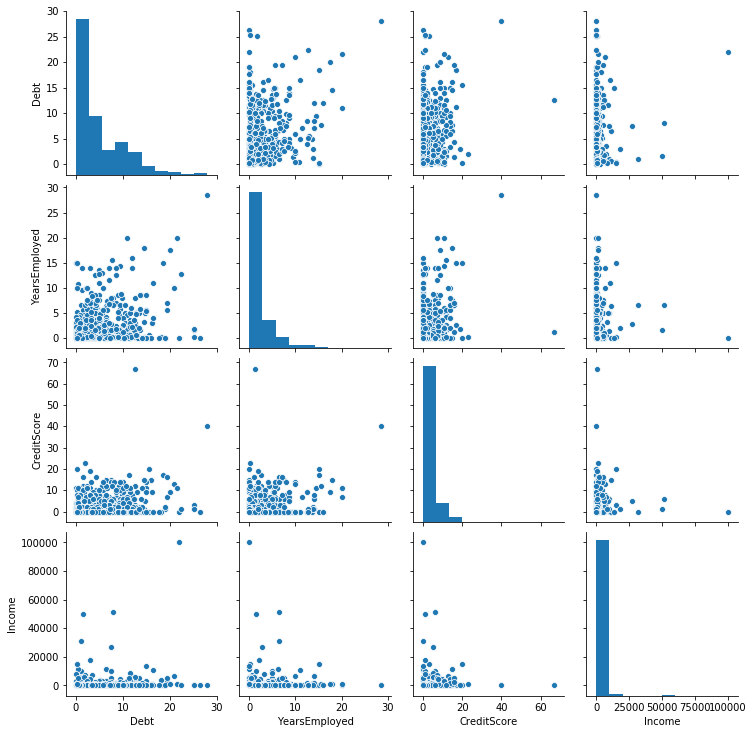

In [12]:
sns.pairplot(df1)

In [13]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for i in df1:
    # Compare if the dtype is object
    if df1[i].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        le.fit(df1[i])
        df1[i]=le.transform(df1[i])

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    int32  
 1   Age             689 non-null    int32  
 2   Debt            689 non-null    float64
 3   Married         689 non-null    int32  
 4   BankCustomer    689 non-null    int32  
 5   EducationLevel  689 non-null    int32  
 6   Ethnicity       689 non-null    int32  
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    int32  
 9   Employed        689 non-null    int32  
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    int32  
 12  Citizen         689 non-null    int32  
 13  ZipCode         689 non-null    int32  
 14  Income          689 non-null    int64  
 15  Approved        689 non-null    int32  
dtypes: float64(2), int32(12), int64(2)
memory usage: 54.0 KB


In [15]:
df1.to_csv('Credit.csv')

In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array

df1.values

# Segregate features and labels into separate variables
X = df1.iloc[:,0:14] 
Y = df1.iloc[:,15]

# Split into train and test sets  
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.33,random_state=42)


In [37]:
X

,Age,Debt,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Income
0,327,4.460,11,3.04,1,1,6,560
1,89,0.500,11,1.50,1,0,0,824
2,125,1.540,13,3.75,1,1,5,3
3,43,5.625,13,1.71,1,0,0,0
4,167,4.000,10,2.50,1,0,0,0
...,...,...,...,...,...,...,...,...
684,52,10.085,5,1.25,0,0,0,0
685,71,0.750,2,2.00,0,1,2,394
686,97,13.500,6,2.00,0,1,1,1
687,20,0.205,1,0.04,0,0,0,750


In [17]:
# Import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

# Print the confusion matrix of the logreg model
print('Confusion matrix: \n ', confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.8508771929824561
Confusion matrix: 
  [[ 89  11]
 [ 23 105]]


In [20]:
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001] 
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol= tol, max_iter= max_iter)

In [21]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=21)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = sc_x.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, Y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.852408 using {'max_iter': 100, 'tol': 0.01}


# Making model with selective features

In [22]:
df2 = df1[['Age','Debt','EducationLevel','YearsEmployed','PriorDefault','Employed','CreditScore','Income','Approved']]

In [23]:
df2

,Age,Debt,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,327,4.460,11,3.04,1,1,6,560,0
1,89,0.500,11,1.50,1,0,0,824,0
2,125,1.540,13,3.75,1,1,5,3,0
3,43,5.625,13,1.71,1,0,0,0,0
4,167,4.000,10,2.50,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
684,52,10.085,5,1.25,0,0,0,0,1
685,71,0.750,2,2.00,0,1,2,394,1
686,97,13.500,6,2.00,0,1,1,1,1
687,20,0.205,1,0.04,0,0,0,750,1


In [24]:
df2.isnull().sum()

Age               0
Debt              0
EducationLevel    0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Income            0
Approved          0
dtype: int64

In [25]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array

df1.values

# Segregate features and labels into separate variables
X = df2.iloc[:,0:8] 
Y = df2.iloc[:,-1]

# Split into train and test sets  
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.33,random_state=42)


In [26]:
X

,Age,Debt,EducationLevel,YearsEmployed,PriorDefault,Employed,CreditScore,Income
0,327,4.460,11,3.04,1,1,6,560
1,89,0.500,11,1.50,1,0,0,824
2,125,1.540,13,3.75,1,1,5,3
3,43,5.625,13,1.71,1,0,0,0
4,167,4.000,10,2.50,1,0,0,0
...,...,...,...,...,...,...,...,...
684,52,10.085,5,1.25,0,0,0,0
685,71,0.750,2,2.00,0,1,2,394
686,97,13.500,6,2.00,0,1,1,1
687,20,0.205,1,0.04,0,0,0,750


In [27]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
684    1
685    1
686    1
687    1
688    1
Name: Approved, Length: 689, dtype: int32

In [28]:
# Import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

# Print the confusion matrix of the logreg model
print('Confusion matrix: \n ', confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.868421052631579
Confusion matrix: 
  [[ 96   4]
 [ 26 102]]


In [36]:
pickle.dump(logreg,open('model.pkl','wb'))